# Big Data Analytics – NYC Taxi Sample Dataset

This notebook demonstrates basic analytics on a real-style taxi dataset.

In [2]:
import pandas as pd

df = pd.read_csv('nyc_taxi_sample.csv')
df.head()


,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,fare_amount,tip_amount,total_amount
0,2023-01-01 08:00:00,2023-01-01 08:15:00,1,1.2,6.5,1.0,7.5
1,2023-01-01 09:00:00,2023-01-01 09:15:00,2,3.5,14.2,2.5,16.7
2,2023-01-01 10:00:00,2023-01-01 10:15:00,1,2.1,9.8,0.0,9.8
3,2023-01-01 11:00:00,2023-01-01 11:15:00,3,5.0,21.0,4.0,25.0
4,2023-01-01 12:00:00,2023-01-01 12:15:00,2,0.8,5.5,0.0,5.5


## Task 1 – Data Overview

In [3]:
df.shape
print("Number of rows", len(df))
print("Number of columns", df.shape[1])

print("Number of missing values in each column")
print(df.isnull().sum())
# also visibly no missing values

print("\n")

# Invalid amounts would only be negative amounts, so only save
# the amount that are larger than 0:

df = df[df['trip_distance'] > 0]
df = df[df['fare_amount'] > 0]

# MIssing would be the value of null, if it is present, change
# it for 0:

df['tip_amount'] = df['tip_amount'].fillna(0)
df.head()





Number of rows 10
Number of columns 7
Number of missing values in each column
pickup_datetime     0
dropoff_datetime    0
passenger_count     0
trip_distance       0
fare_amount         0
tip_amount          0
total_amount        0
dtype: int64




,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,fare_amount,tip_amount,total_amount
0,2023-01-01 08:00:00,2023-01-01 08:15:00,1,1.2,6.5,1.0,7.5
1,2023-01-01 09:00:00,2023-01-01 09:15:00,2,3.5,14.2,2.5,16.7
2,2023-01-01 10:00:00,2023-01-01 10:15:00,1,2.1,9.8,0.0,9.8
3,2023-01-01 11:00:00,2023-01-01 11:15:00,3,5.0,21.0,4.0,25.0
4,2023-01-01 12:00:00,2023-01-01 12:15:00,2,0.8,5.5,0.0,5.5


## Task 2 – Descriptive Statistics

In [17]:
desc = df[['trip_distance','fare_amount','total_amount']].describe()
print(desc)

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['trip_duration_min'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60
avg_duration = df['trip_duration_min'].mean()
# Averages for the values: 3.030000    13.280000     15.420000
print("Ave rage trip duration:")
print(int(avg_duration), "minutes")

# So a typical ride is for 3 kms, 13 dollars and lasts 15 minutes


       trip_distance  fare_amount  total_amount
count      10.000000    10.000000     10.000000
mean        3.030000    13.280000     15.420000
std         1.757555     6.816777      8.387928
min         0.800000     5.500000      5.500000
25%         1.650000     7.850000      8.750000
50%         2.850000    12.250000     14.500000
75%         4.025000    16.525000     19.550000
max         6.300000    26.800000     31.800000
Ave rage trip duration:
15 minutes


## Task 3 – Average Trip Duration

pickup_hour
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
dtype: int64
Minimum number of trips per hour: 1 during hour 8 
Maximum number of trips per hour: 1 during hour 8 


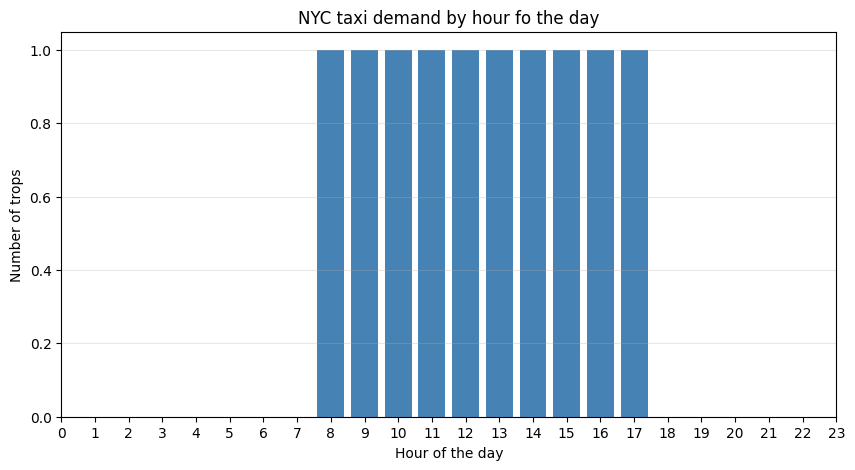

In [28]:
df["pickup_hour"] = df["pickup_datetime"].dt.hour
trips_per_hour = df.groupby("pickup_hour").size()
print(trips_per_hour)
type(trips_per_hour)

min_hour = trips_per_hour.idxmin()
min_trips = trips_per_hour.min()
print("Minimum number of trips per hour:", min_trips, "during hour", min_hour, "")

max_hour = trips_per_hour.idxmax()
max_trips = trips_per_hour.max()
print("Maximum number of trips per hour:", max_trips, "during hour", max_hour, "")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(trips_per_hour.index, trips_per_hour.values, color="steelblue")
plt.xlabel("Hour of the day")
plt.ylabel("Number of trops")
plt.title("NYC taxi demand by hour fo the day")
plt.xticks(range(0,24))
plt.grid(axis="y", alpha = 0.3)
plt.show()


## Task 4 – Revenue Analysis

In [33]:

total_revenue = df['total_amount'].sum()
avg_revenue = df['total_amount'].mean()
print(total_revenue)
print(avg_revenue)

# locations are missing


154.2
15.419999999999998


## Task 5 – Tip Analysis

In [37]:

avg_tip = df['tip_amount'].mean()
zero_tip_pct = (df['tip_amount'] == 0).mean() * 100
print(avg_tip, zero_tip_pct)

#Analysis
df_with_tips = df[df['tip_amount'] > 0]
avg_tip_pct = (df_with_tips['tip_amount'] / df_with_tips['fare_amount']).mean() * 100
print(f"Average tip percentage (when tipping): {avg_tip_pct:.1f}%")

# Correlation
correlation = df['fare_amount'].corr(df['tip_amount'])
print(f"\nCorrelation between fare and tip: {correlation:.3f}")

# Conclusions:
# MOst people tip, average is 2.14
# The higher the fare amount, the higher is the tip. Correlation is 0.944



2.1399999999999997 20.0
Average tip percentage (when tipping): 17.8%

Correlation between fare and tip: 0.944


## Task 6 – Distance vs Fare Correlation

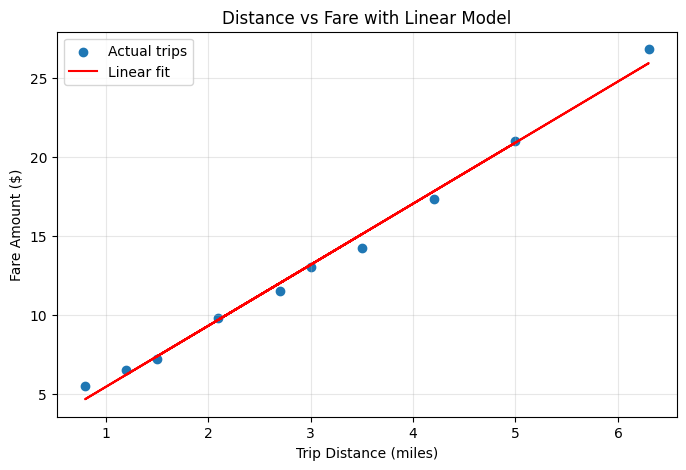

In [39]:
df[['trip_distance','fare_amount']].corr()

import numpy as np
b, a = np.polyfit(df['trip_distance'], df['fare_amount'], 1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(df['trip_distance'], df['fare_amount'], label='Actual trips')
plt.plot(df['trip_distance'], a + b * df['trip_distance'], color='red', label='Linear fit')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Distance vs Fare with Linear Model')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# INterpretation:
# strong correlation, which make sense, as fare increases proportionally with distance


In [40]:
## TASK 7

# Management: high correlation suggests that pricing model works as expected

# Drivers: higher fares correlate with higher tips! Drivers should take longer rides

# Planners: Typical trip is short: 3 miles and 15 minutes, so taxis have their role in transportation system that complements the role of public transport.


In [42]:
### BONUS TASK

# Create target variable
df['has_tip'] = (df['tip_amount'] > 0).astype(int)

# Simple rule-based model using fare threshold
# Logic: higher fare trips are more likely to receive tips
fare_threshold = df['fare_amount'].median()

# Predict: if fare > median, predict tip (1), else no tip (0)
df['predicted_tip'] = (df['fare_amount'] > fare_threshold).astype(int)

# Calculate accuracy
correct = (df['has_tip'] == df['predicted_tip']).sum()
accuracy = correct / len(df)

print(f"Model: Rule-based (fare > ${fare_threshold:.2f} predicts tip)")
print(f"Accuracy: {accuracy:.2%} ({correct}/{len(df)} correct)")

df.head()

# Model description:
# - Simple threshold classifier using fare amount
# - Based on observation that higher fares correlate with tips
# - Limitation: single-feature model, small sample size


Model: Rule-based (fare > $12.25 predicts tip)
Accuracy: 70.00% (7/10 correct)


,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,trip_duration_min,pickup_hour,has_tip,predicted_tip
0,2023-01-01 08:00:00,2023-01-01 08:15:00,1,1.2,6.5,1.0,7.5,15.0,8,1,0
1,2023-01-01 09:00:00,2023-01-01 09:15:00,2,3.5,14.2,2.5,16.7,15.0,9,1,1
2,2023-01-01 10:00:00,2023-01-01 10:15:00,1,2.1,9.8,0.0,9.8,15.0,10,0,0
3,2023-01-01 11:00:00,2023-01-01 11:15:00,3,5.0,21.0,4.0,25.0,15.0,11,1,1
4,2023-01-01 12:00:00,2023-01-01 12:15:00,2,0.8,5.5,0.0,5.5,15.0,12,0,0
